# Story data 
In this notebook, we will sketch out a tale worth telling. This notebook will mainly be used to generate figures and data for the oultine. Every block of code will have some info as to why the data/figure it generates are needed.

In [1]:
import psi4
import numpy as np
from scipy.linalg import eigh
from compChem import Hartree_fock


We will make figures of the $H_2$ stretch. These pictures will be used to show the effect of spin contamination on a practical system.


In [4]:
psi4.set_options({"basis":"sto-3g", "scf_type":"pk", "reference":"rhf", "d_convergence":"1e-12"}) # cc-pvdz is chosen because uhf and cuhf will use this basis as well
hydrogen = Hartree_fock.UHFMolecule("""H""")
hydrogen.setConvergence(1e-12)
h_energy = hydrogen.iterator(mute=True, criterion="energy")[0]
h_energy


-0.46658184955727544

In [9]:
import numpy as np
distances = np.arange(0.2, 5, 0.1)
energies_rhf = []
spincont_rhf = []
for distance in distances:
    h2 = Hartree_fock.RHFMolecule(f"""
    H 0 0 0
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True, criterion="energy")
    energies_rhf.append(E[0] - 2*h_energy)
    spincont_rhf.append(h2.getSpinContamination())

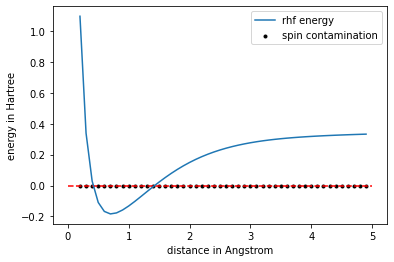

In [10]:
import matplotlib.pyplot as plt
p = plt.plot(distances, energies_rhf, label="rhf energy")
plt.scatter(distances, spincont_rhf, label="spin contamination", color="black", marker=".")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.hlines(0, 0, 5, color="red", linestyles="--")
plt.legend(loc="upper right")

In [11]:
import numpy as np
distances = np.arange(0.2, 5, 0.1)
energies_uhf = []
spincont_uhf = []
for distance in distances:
    h2 = Hartree_fock.UHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True)
    energies_uhf.append(E[0] - 2*h_energy)
    spincont_uhf.append(h2.getSpinContamination())

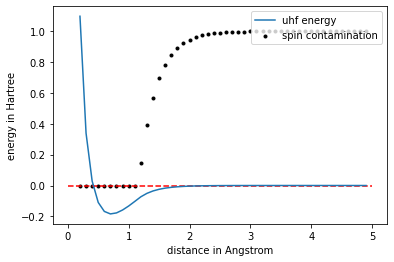

In [12]:
p = plt.plot(distances, energies_uhf, label="uhf energy")
plt.hlines(0, 0, 5, color="red", linestyles="--")
plt.scatter(distances, spincont_uhf, color="black", marker=".", label="spin contamination")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.legend(loc="upper right")
p

In [13]:
distances = np.arange(0.2, 5, 0.1)
energies_cuhf = []
spincont_cuhf = []
for distance in distances:
    h2 = Hartree_fock.CUHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True, criterion="energy", mixedGuess=True)
    energies_cuhf.append(E[0] - 2*h_energy)
    spincont_cuhf.append(h2.getSpinContamination())


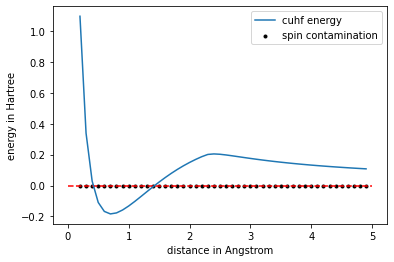

In [14]:
import matplotlib.pyplot as plt
p = plt.plot(distances, energies_cuhf, label="cuhf energy")
plt.hlines(0, 0, 5, color="red", linestyles="--")
plt.scatter(distances, spincont_cuhf, color="black", marker=".", label="spin contamination")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.legend(loc="upper right")
p

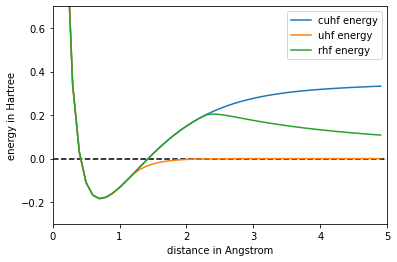

In [15]:
energies = np.array([energies_rhf, energies_uhf, energies_cuhf]).T
p = plt.plot(distances, energies)
plt.hlines(0, 0, 5, color="black", linestyles="--")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.legend(["cuhf energy", "uhf energy", "rhf energy"], loc="upper right")
plt.axis([0, 5, -0.3, 0.7])
p

The CIS data still needs to be checked. We will already generate some data for $H_3$ in STO-3G.


In [11]:
h3_uhf = UHFMolecule("""
H 0 0 0
H 0 0.86602540378 0.5
H 0 0 1
units angstrom""")
h3_uhf.setConvergence(1e-12)
end_data = h3_uhf.iterator(mute=True, criterion="energy")
end_data

/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/uhf.py:110: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  assert self.guessMatrix_a != "empty" and self.guessMatrix_b != "empty", "make a guess first"
/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/hf_backbone.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.guessMatrix_a == "empty" and self.guessMatrix_b == "empty":


(-1.3359800541782527, 161)

In [12]:
h3_uhf_cis = CISMolecule(h3_uhf)
h3_uhf_cis.GetExitations("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/definitive_versions/theory/outline_BachelorProject/data/h3_uhf.txt")

In [13]:
h3_cuhf = CUHFMolecule("""
H 0 0 0
H 0 0.86602540378 0.5
H 0 0 1
units angstrom""")
h3_cuhf.setConvergence(1e-12)
end_data = h3_cuhf.iterator(mute=True, criterion="energy")
end_data

/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/uhf.py:110: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  assert self.guessMatrix_a != "empty" and self.guessMatrix_b != "empty", "make a guess first"
/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/hf_backbone.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.guessMatrix_a == "empty" and self.guessMatrix_b == "empty":


(-1.3359800541782527, 161)

In [14]:
h3_cuhf_cis = CISMolecule(h3_cuhf)
h3_cuhf_cis.GetExitations("/user/gent/440/vsc44013/Bachelor_project/Bachelor_project/definitive_versions/theory/outline_BachelorProject/data/h3_cuhf.txt")